<a href="https://colab.research.google.com/github/trantoan62/AI-CNN-TranQuocToan/blob/main/tropical_fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import plotly.graph_objects as go
from keras.preprocessing.image import load_img, img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/tropical_fruits/train'
test_path = '/content/drive/MyDrive/tropical_fruits/test'

In [4]:
X_train = ImageDataGenerator(rescale=1/255)
X_test = ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset = X_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/tropical_fruits/train",
    target_size=(200, 200),
    batch_size=3,
    class_mode="categorical",
    )
test_dataset = X_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/tropical_fruits/test",
    target_size=(200, 200),
    batch_size=3,
    class_mode= "categorical",
    )

Found 449 images belonging to 10 classes.
Found 184 images belonging to 10 classes.


In [6]:
train_dataset.classes
train_dataset.class_indices

{'apple': 0,
 'avovado': 1,
 'banana': 2,
 'guava': 3,
 'mango': 4,
 'orange': 5,
 'papaya': 6,
 'pomegranate': 7,
 'starfruit': 8,
 'watermelon': 9}

In [7]:
model = Sequential([
    Conv2D(16,(3,3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(),
    Conv2D(32,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [8]:
model.compile(loss = ['categorical_crossentropy'], 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [10]:
history=model.fit(train_dataset, epochs=50, batch_size=32, verbose=1, validation_data= test_dataset)

Epoch 1/50
150/150 [==============================] - 3s 21ms/step - loss: 0.3930 - accuracy: 0.8775 - val_loss: 2.3263 - val_accuracy: 0.5924
Epoch 2/50
150/150 [==============================] - 3s 22ms/step - loss: 0.3032 - accuracy: 0.9154 - val_loss: 3.0950 - val_accuracy: 0.5598
Epoch 3/50
150/150 [==============================] - 3s 21ms/step - loss: 0.1996 - accuracy: 0.9465 - val_loss: 2.9338 - val_accuracy: 0.6304
Epoch 4/50
150/150 [==============================] - 3s 21ms/step - loss: 0.0869 - accuracy: 0.9755 - val_loss: 3.0709 - val_accuracy: 0.6467
Epoch 5/50
150/150 [==============================] - 3s 21ms/step - loss: 0.0913 - accuracy: 0.9733 - val_loss: 3.9738 - val_accuracy: 0.6250
Epoch 6/50
150/150 [==============================] - 3s 21ms/step - loss: 0.3391 - accuracy: 0.9087 - val_loss: 2.1682 - val_accuracy: 0.5978
Epoch 7/50
150/150 [==============================] - 3s 21ms/step - loss: 0.2109 - accuracy: 0.9399 - val_loss: 3.0688 - val_accuracy: 0.6413

In [11]:
model.save('tropical_fruits.h5')

In [15]:
model5 = load_model('tropical_fruits.h5')

In [32]:
labels = {0: 'apple',
 1:'avovado',
 2:'banana',
 3:'guava',
 4:'mango',
 5:'orange',
 6:'papaya',
 7:'pomegranate',
 8:'starfruit',
 9:'watermelon'}

This is:  orange


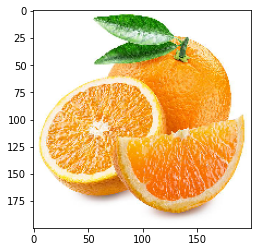

In [35]:
img = load_img('/content/orange.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  watermelon


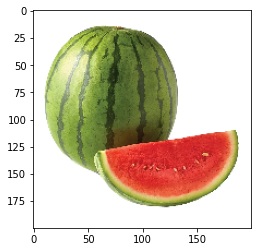

In [36]:
img = load_img('/content/watermelon.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  banana


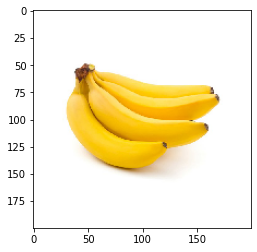

In [37]:
img = load_img('/content/banana.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])